## Introduction
This notebook focuses on predicting sneaker resale prices using machine learning techniques. The goal is to build a predictive model that can assist sneaker resellers in determining optimal pricing strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Cleaning

In [2]:
df = pd.read_csv("StockX-Data-Contest-2019.csv")
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [4]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%y')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2017-02-11,11.0,Rhode Island


In [5]:
df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-', ' '))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,"$1,097",$220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,$685,$220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,$690,$220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,"$1,075",$220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,$828,$220,2017-02-11,11.0,Rhode Island


In [6]:
df['Sale Price'] = df['Sale Price'].apply(lambda x: x.replace('$', ''))
df['Sale Price'] = df['Sale Price'].apply(lambda x: x.replace(',',''))
df['Retail Price'] = df['Retail Price'].apply(lambda x: x.replace('$', ''))
df['Retail Price'] = df['Retail Price'].apply(lambda x: x.replace(',', ''))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


## Data Exploration
In this section, we explore the dataset to understand its structure, identify patterns, and perform necessary preprocessing steps such as handling missing values and encoding categorical variables.

In [7]:
df.shape

(99956, 8)

In [8]:
df.info

<bound method DataFrame.info of       Order Date   Brand                                   Sneaker Name  \
0     2017-09-01   Yeezy           Adidas Yeezy Boost 350 Low V2 Beluga   
1     2017-09-01   Yeezy    Adidas Yeezy Boost 350 V2 Core Black Copper   
2     2017-09-01   Yeezy     Adidas Yeezy Boost 350 V2 Core Black Green   
3     2017-09-01   Yeezy       Adidas Yeezy Boost 350 V2 Core Black Red   
4     2017-09-01   Yeezy  Adidas Yeezy Boost 350 V2 Core Black Red 2017   
...          ...     ...                                            ...   
99951 2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   
99952 2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   
99953 2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   
99954 2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   
99955 2019-02-13   Yeezy    adidas Yeezy Boost 350 V2 Static Reflective   

      Sale Price Retail Price Release Date  Shoe Size  Buyer Region

In [9]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [10]:
df = df.rename(columns = {
    "Order Date" : "Order_Date",
    "Sneaker Name" : "Sneaker_Name",
    "Sale Price" : "Sale_Price",
    "Retail Price" : "Retail_Price",
    "Release Date" : "Release_Date",
    "Shoe Size" : "Shoe_Size",
    "Buyer Region" : "Buyer_Region"})

In [11]:
df.columns

Index(['Order_Date', 'Brand', 'Sneaker_Name', 'Sale_Price', 'Retail_Price',
       'Release_Date', 'Shoe_Size', 'Buyer_Region'],
      dtype='object')

In [12]:
df['Brand'].value_counts()

Brand
 Yeezy       72162
Off-White    27794
Name: count, dtype: int64

In [13]:
df['Shoe_Size'].value_counts(normalize=True)

Shoe_Size
10.0    0.110979
9.0     0.097103
11.0    0.092551
10.5    0.087879
9.5     0.086888
12.0    0.073002
8.0     0.053654
8.5     0.053023
13.0    0.046040
11.5    0.045040
6.0     0.040148
7.0     0.038687
5.0     0.035786
7.5     0.026652
5.5     0.026222
4.0     0.022420
6.5     0.022200
14.0    0.017918
4.5     0.013046
12.5    0.006283
13.5    0.001471
15.0    0.001301
14.5    0.000840
16.0    0.000790
17.0    0.000040
3.5     0.000040
Name: proportion, dtype: float64

In [14]:
df.dtypes

Order_Date      datetime64[ns]
Brand                   object
Sneaker_Name            object
Sale_Price              object
Retail_Price            object
Release_Date    datetime64[ns]
Shoe_Size              float64
Buyer_Region            object
dtype: object

In [15]:
df['Sale_Price'] = df['Sale_Price'].astype(float)
df['Retail_Price'] = df['Retail_Price'].astype(float)

In [16]:
df['Profit'] = df['Sale_Price'] - df['Retail_Price']

In [17]:
df.Profit.median()

154.0

In [18]:
region_df = df[df['Buyer_Region'] == 'Nebraska']

In [19]:
region_df['Sale_Price'].sum()

100333.0

In [20]:
sizes = [9.5, 10]
df[df['Shoe_Size'].isin(sizes)]

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Profit
7,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Cream White,460.0,220.0,2017-04-29,10.0,New York,240.0
11,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Cream White,473.0,220.0,2017-04-29,10.0,Texas,253.0
17,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,610.0,220.0,2017-02-25,10.0,New Jersey,390.0
21,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,586.0,220.0,2017-02-25,9.5,Oregon,366.0
30,2017-09-02,Yeezy,Adidas Yeezy Boost 350 V2 Cream White,479.0,220.0,2017-04-29,10.0,Delaware,259.0
...,...,...,...,...,...,...,...,...,...
99926,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static,330.0,220.0,2018-12-27,10.0,Oregon,110.0
99933,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static,325.0,220.0,2018-12-27,10.0,Oregon,105.0
99934,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static,350.0,220.0,2018-12-27,9.5,California,130.0
99947,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,618.0,220.0,2018-12-26,9.5,California,398.0


<Axes: title={'center': 'Sale Price by Size'}, xlabel='Shoe Size', ylabel='Avg. Sale Price ($)'>

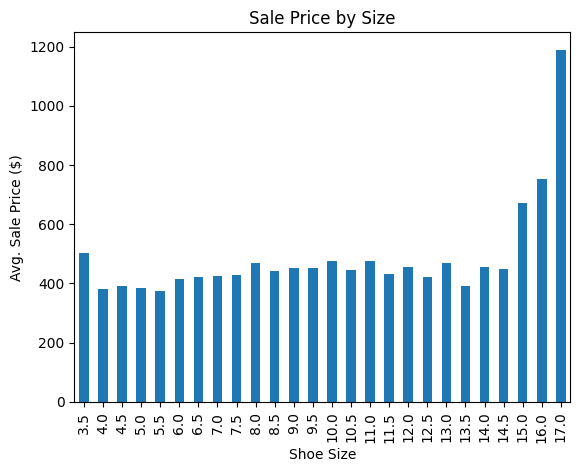

In [21]:
df.groupby('Shoe_Size')['Sale_Price'].mean().plot.bar(xlabel='Shoe Size', ylabel = 'Avg. Sale Price ($)', title = 'Sale Price by Size')

In [22]:
df.groupby('Sneaker_Name')['Sale_Price'].mean().sort_values(ascending=False)

Sneaker_Name
Air Jordan 1 Retro High Off White White              1826.070288
Air Jordan 1 Retro High Off White Chicago            1769.800000
Adidas Yeezy Boost 350 Low Turtledove                1531.661765
Nike Air Presto Off White                            1236.055369
Adidas Yeezy Boost 350 Low Oxford Tan                1011.514286
Adidas Yeezy Boost 350 Low Moonrock                   996.710000
Adidas Yeezy Boost 350 Low Pirate Black 2016          984.237705
Nike Air Force 1 Low Virgil Abloh Off White AF100     975.516129
Adidas Yeezy Boost 350 V2 Core Black Red              937.754967
Adidas Yeezy Boost 350 Low Pirate Black 2015          895.094737
Nike Air Max 97 Off White Elemental Rose Queen        893.782407
Nike Air VaporMax Off White                           856.676190
Air Jordan 1 Retro High Off White University Blue     850.853506
Adidas Yeezy Boost 350 V2 Core Black Red 2017         804.304438
Adidas Yeezy Boost 350 Low V2 Beluga                  788.704819
Nike Blazer 

In [23]:
df[df['Sneaker_Name'].str.contains('Nike') | df['Sneaker_Name'].str.contains('Jordan')]

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Profit
128,2017-09-07,Off-White,Nike Air Max 90 Off White,1600.0,160.0,2017-09-09,8.0,California,1440.0
129,2017-09-07,Off-White,Nike Air Max 90 Off White,1090.0,160.0,2017-09-09,11.5,New York,930.0
130,2017-09-07,Off-White,Nike Air Presto Off White,1344.0,160.0,2017-09-09,10.0,New York,1184.0
131,2017-09-07,Off-White,Nike Air Presto Off White,1325.0,160.0,2017-09-09,10.0,Massachusetts,1165.0
132,2017-09-07,Off-White,Nike Air VaporMax Off White,1800.0,250.0,2017-09-09,12.0,Kentucky,1550.0
...,...,...,...,...,...,...,...,...,...
99869,2019-02-13,Off-White,Nike Zoom Fly Off White Pink,265.0,170.0,2018-11-28,11.0,New York,95.0
99870,2019-02-13,Off-White,Nike Zoom Fly Off White Pink,331.0,170.0,2018-11-28,4.0,California,161.0
99871,2019-02-13,Off-White,Nike Zoom Fly Off White Pink,405.0,170.0,2018-11-28,6.0,New York,235.0
99872,2019-02-13,Off-White,Nike Zoom Fly Off White Pink,263.0,170.0,2018-11-28,10.0,Maryland,93.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker_Name  99956 non-null  object        
 3   Sale_Price    99956 non-null  float64       
 4   Retail_Price  99956 non-null  float64       
 5   Release_Date  99956 non-null  datetime64[ns]
 6   Shoe_Size     99956 non-null  float64       
 7   Buyer_Region  99956 non-null  object        
 8   Profit        99956 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 6.9+ MB


In [25]:
df['Order_Date'].dt.month_name().value_counts()

Order_Date
December     22292
November     15489
January      14511
February      7774
July          7434
October       7307
August        6090
June          5431
September     4671
May           3456
April         2756
March         2745
Name: count, dtype: int64

In [26]:
df.resample('M', on = 'Order_Date')['Sale_Price'].sum().sort_values(ascending=False).head(5)

Order_Date
2018-12-31    5068068.0
2019-01-31    4029845.0
2018-11-30    3785398.0
2017-12-31    3211053.0
2018-08-31    3162458.0
Name: Sale_Price, dtype: float64

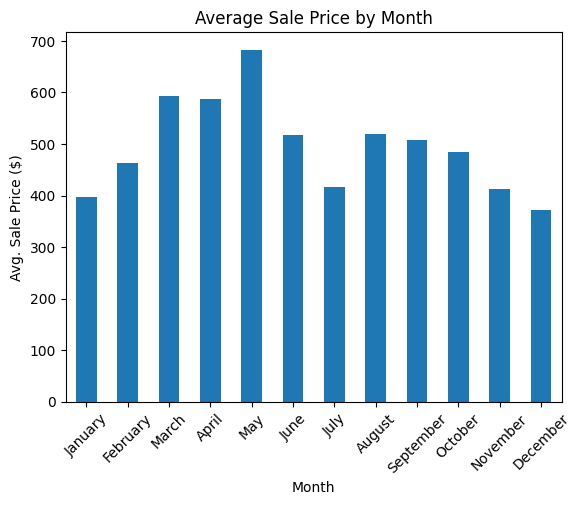

In [27]:
df['Month'] = df['Order_Date'].dt.month

mean_sale_price_by_month = df.groupby('Month')['Sale_Price'].mean().sort_index()

ax = mean_sale_price_by_month.plot.bar()
ax.set_xlabel('Month')
ax.set_ylabel('Avg. Sale Price ($)')
ax.set_title('Average Sale Price by Month')

ax.set_xticks(range(12))
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)

plt.show()


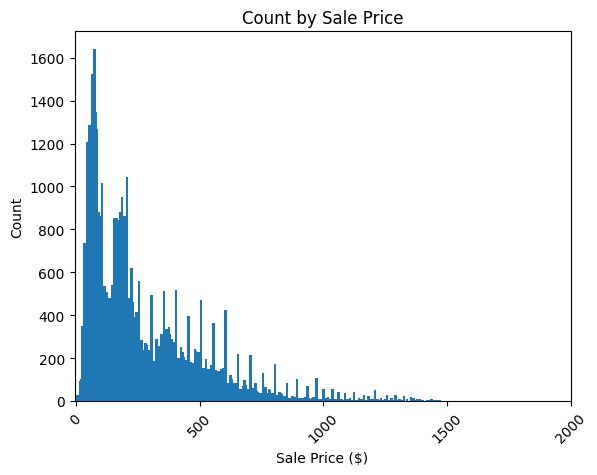

In [28]:
sale_price_counts = df['Sale_Price'].value_counts().sort_index()

ax = sale_price_counts.plot.bar(width=10)

ax.set_xlabel('Sale Price ($)')
ax.set_ylabel('Count')
ax.set_title('Count by Sale Price')
ax.set_xticks(range(0, 2001, 500))
ax.set_xticklabels(range(0, 2001, 500), rotation=45)

plt.show()


In [29]:
df['Bought for Less than Retail'] = df['Sale_Price'] < df['Retail_Price']
df['Bought for Retail'] = df['Sale_Price'] == df['Retail_Price']
df['Bought for More than Retail'] = df['Sale_Price'] > df['Retail_Price']
df.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Profit,Month,Bought for Less than Retail,Bought for Retail,Bought for More than Retail
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097.0,220.0,2016-09-24,11.0,California,877.0,9,False,False,True
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685.0,220.0,2016-11-23,11.0,California,465.0,9,False,False,True
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690.0,220.0,2016-11-23,11.0,California,470.0,9,False,False,True
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075.0,220.0,2016-11-23,11.5,Kentucky,855.0,9,False,False,True
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828.0,220.0,2017-02-11,11.0,Rhode Island,608.0,9,False,False,True


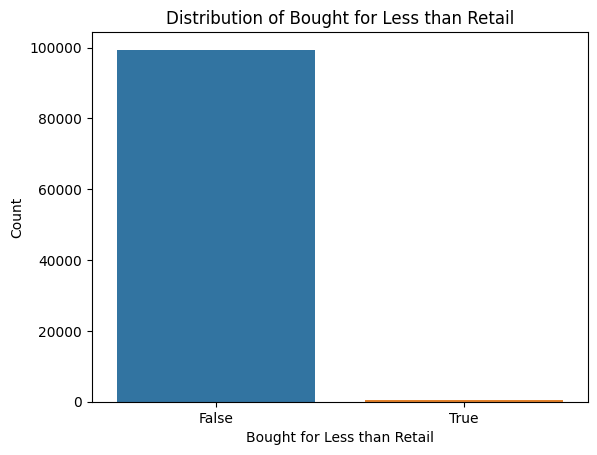

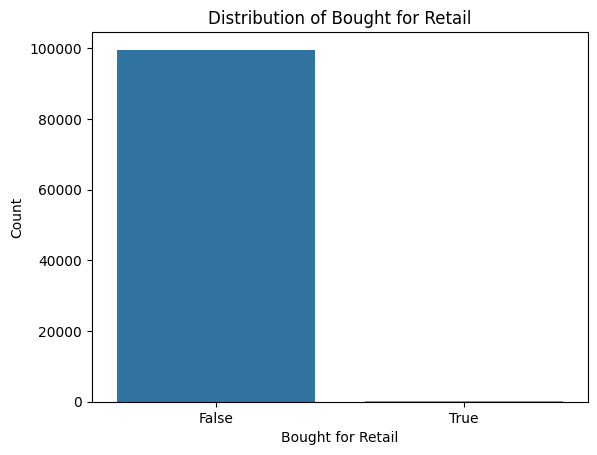

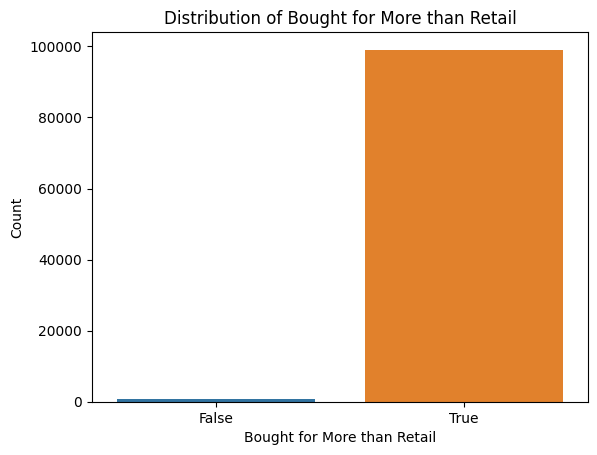

In [30]:
def plot_boolean_columns(df):
    for column in df.columns:
        if df[column].dtype == 'bool':
            counts = df[column].value_counts()
            sns.barplot(x=counts.index, y=counts.values)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks([0, 1], ['False', 'True'])
            plt.show()
            
plot_boolean_columns(df)

In [31]:
df['ROI'] = round(((df['Sale_Price'] - df['Retail_Price']) / df['Retail_Price']) * 100, 2)
df['Month'] = df.Order_Date.dt.month
df['Day'] = df.Order_Date.dt.weekday
df['Days_Since_Release'] = (df['Order_Date'] - df['Release_Date']).dt.days.astype('int64')
df = df[df['Days_Since_Release'] > -30]
df['Days_Since_Release'] = df['Days_Since_Release'] + 29
df.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Profit,Month,Bought for Less than Retail,Bought for Retail,Bought for More than Retail,ROI,Day,Days_Since_Release
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097.0,220.0,2016-09-24,11.0,California,877.0,9,False,False,True,398.64,4,371
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685.0,220.0,2016-11-23,11.0,California,465.0,9,False,False,True,211.36,4,311
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690.0,220.0,2016-11-23,11.0,California,470.0,9,False,False,True,213.64,4,311
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075.0,220.0,2016-11-23,11.5,Kentucky,855.0,9,False,False,True,388.64,4,311
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828.0,220.0,2017-02-11,11.0,Rhode Island,608.0,9,False,False,True,276.36,4,231


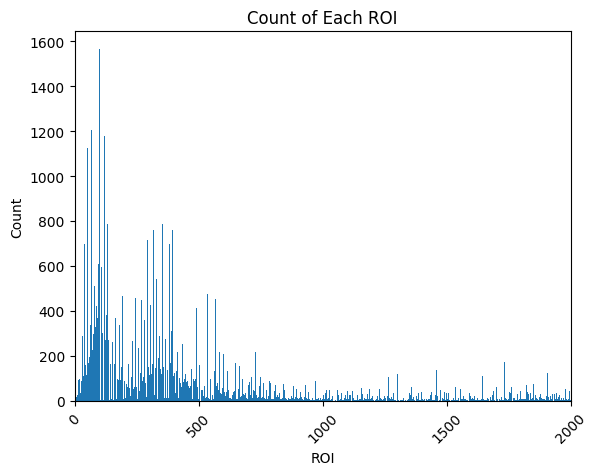

In [32]:
roi_counts = df['ROI'].value_counts().sort_index()
ax = roi_counts.plot.bar(width=2)

ax.set_xlabel('ROI')
ax.set_ylabel('Count')
ax.set_title('Count of Each ROI')

max_roi = 2000
ticks = range(0, max_roi + 500, 500)

ax.set_xticks(ticks)
ax.set_xlim(left=0, right=max_roi)

ax.set_xticklabels([str(tick) for tick in ticks], rotation=45)

plt.show()


## Modeling
In this project, the Return on Investment (ROI) variable was created as the target variable to classify sneakers into two categories: High ROI and Low ROI. The categorization was based on the resale price relative to the retail price.

Initially, the data was imbalanced, with a significantly larger proportion of sneakers falling into the High ROI category compared to the Low ROI category. This imbalance led to a skewed model performance, as the RandomForestClassifier achieved a high precision score of 99%. However, this score was indicative of overfitting rather than true predictive accuracy, as the model disproportionately favored the majority class.

To address this, the data was rebalanced through sampling techniques, creating a more equitable distribution between the High and Low ROI categories. After rebalancing, the model was retrained, achieving a more realistic and reliable precision score of 93%.

This process highlights the importance of addressing class imbalance to ensure the model's performance reflects its ability to generalize across all categories.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

predictors = ["Brand", "Retail_Price", "Sneaker_Name", "Shoe_Size", 'Month', 'Day']
target = 'ROI'

df_encoded = pd.get_dummies(df[predictors])

X = df_encoded
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

model = RandomForestRegressor(n_estimators=250, min_samples_split=100, random_state=1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1602.9108644138305
R^2 Score: 0.9287229921488409


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

df['ROI_Category'] = pd.cut(df['ROI'], bins=[-float('inf'), 0, float('inf')], labels=['Low', 'High'])

predictors = ["Brand", "Retail_Price", "Sneaker_Name", "Shoe_Size", 'Month', 'Day']
target = 'ROI_Category'

df_encoded = pd.get_dummies(df[predictors])

X = df_encoded
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

precision = precision_score(y_test, predictions, pos_label='High')

print(f"Precision Score: {precision}")

Precision Score: 0.9923740718442705


In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[19780     8]
 [  152    11]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.99      1.00      1.00     19788
         Low       0.58      0.07      0.12       163

    accuracy                           0.99     19951
   macro avg       0.79      0.53      0.56     19951
weighted avg       0.99      0.99      0.99     19951



In [37]:
print(y_train.value_counts())
print(y_test.value_counts())

ROI_Category
High    79079
Low       724
Name: count, dtype: int64
ROI_Category
High    19788
Low       163
Name: count, dtype: int64


In [38]:
#Resampling data because data was highly imbalanced
from sklearn.utils import resample

df_high = df[df['ROI_Category'] == 'High']
df_low = df[df['ROI_Category'] == 'Low']

# Downsample majority class
df_high_downsampled = resample(df_high, replace=False, n_samples=len(df_low), random_state=1)

# Combine downsampled majority with minority
df_balanced = pd.concat([df_high_downsampled, df_low])


In [39]:
predictors = ["Brand", "Retail_Price", "Sneaker_Name", "Shoe_Size"]
df_balanced_encoded = pd.get_dummies(df_balanced[predictors])
X_balanced = df_balanced_encoded
y_balanced = df_balanced['ROI_Category']


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Train-test split
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=1)

# Train the model
model_balanced = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate
predictions_balanced = model_balanced.predict(X_test_balanced)
precision_balanced = precision_score(y_test_balanced, predictions_balanced, pos_label='High')
print(f"Balanced Precision Score: {precision_balanced}")


Balanced Precision Score: 0.9276315789473685


## Conclusion
The notebook demonstrates a comprehensive approach to predicting sneaker resale prices. Key takeaways include the importance of feature selection and tuning model parameters for optimal performance. Potential next steps involve incorporating external data such as market trends or brand popularity indices.